In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import logging
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sep
import pandas as pd
import os
from astropy.table import Table, vstack

In [ ]:
from maddeb.utils import listdir_fullpath, get_data_dir_path

In [ ]:
logging.basicConfig(format="%(message)s", level=logging.INFO)
LOG = logging.getLogger(__name__)

## load the saved results

In [ ]:
density_level = "low"

In [ ]:
data_path = "/sps/lsst/users/bbiswas/MADNESS_results/" + density_level + "_density"
run_name = "kl01" # 12 to 20 galaxies
result_dir_path = os.path.join(data_path, run_name)

In [ ]:
madness_results=[]
scarlet_results=[]
actual_photometry = []
blended_photometry = []

for file_num in range(300):

    madness_results.append(pd.read_pickle(os.path.join(result_dir_path, "madness_results", str(file_num) + ".pkl")))
    scarlet_results.append(pd.read_pickle(os.path.join(data_path, "scarlet_results", str(file_num) + ".pkl")))

    actual_photometry.append(pd.read_pickle(os.path.join(data_path, "actual_photometry", str(file_num) + ".pkl")))
    blended_photometry.append(pd.read_pickle(os.path.join(data_path, "blended_photometry",  str(file_num) + ".pkl")))

madness_results = pd.concat(madness_results)
scarlet_results = pd.concat(scarlet_results)

actual_photometry = pd.concat(actual_photometry)
blended_photometry = pd.concat(blended_photometry)

In [ ]:
# mask=madness_results["r_contamination"].values<5
# madness_results=madness_results[mask]
# scarlet_results=scarlet_results[mask]
# actual_photometry=actual_photometry[mask]
# blended_photometry=blended_photometry[mask]

# Pixel Covariance

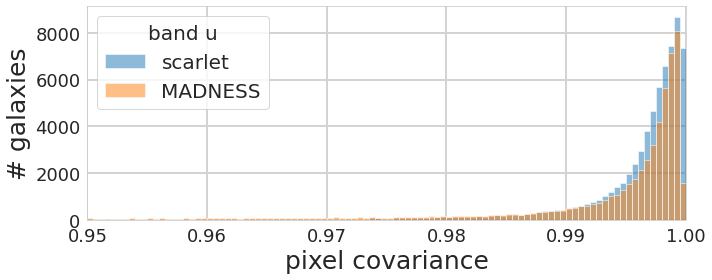

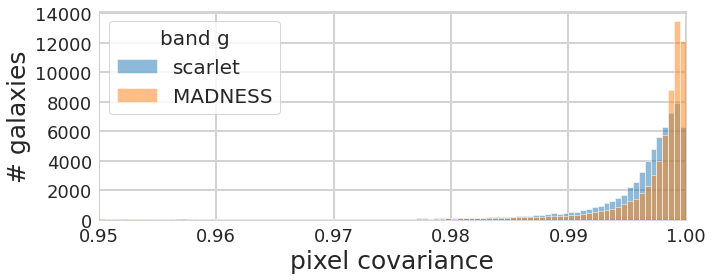

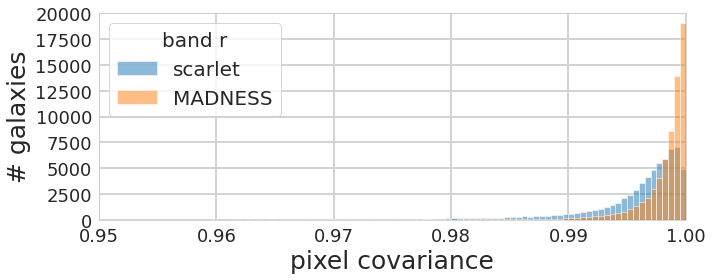

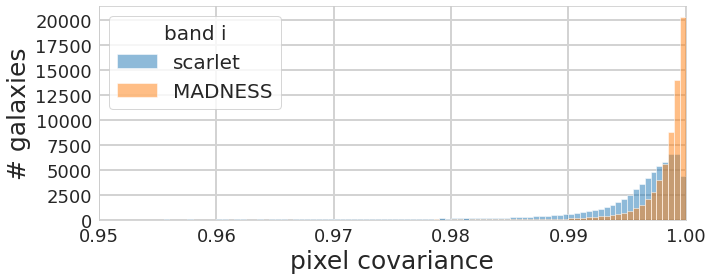

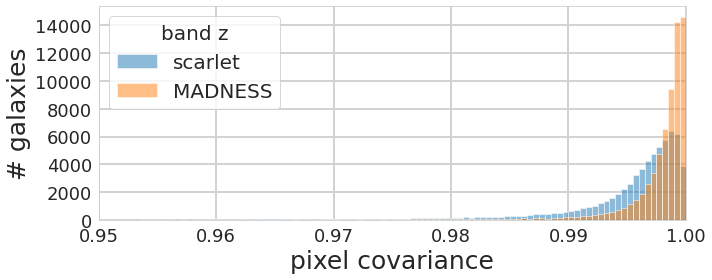

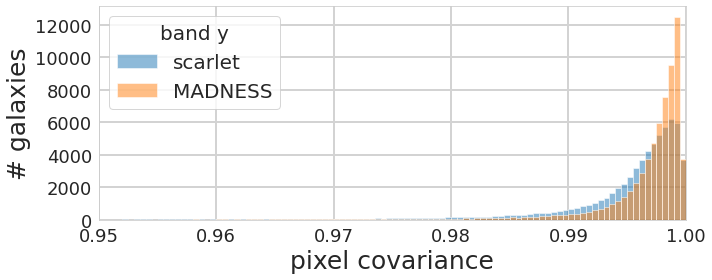

In [ ]:
bins = np.arange(0.95, 1, 0.0005)
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    plt.figure(figsize=(10, 4))
    cov_band = band
    sns.set_style("whitegrid")
    plt.hist(scarlet_results[cov_band + '_covariance'], bins=bins, alpha=0.5, label="scarlet")
    plt.hist(madness_results[cov_band + '_covariance'], bins=bins, alpha=0.5, label="MADNESS")
    plt.legend()
    plt.xlim([0.95, 1])
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("pixel covariance", fontsize=25)
    plt.ylabel("# galaxies", fontsize=25)
    plt.legend(fontsize=20, title="band " + band, loc="upper left", title_fontsize=20)
    ax = plt.gca()
    ax.grid(color='lightgray', linestyle='-', linewidth=2)
    plt.tight_layout()
    plt.savefig(result_dir_path + "/cov_res_"+band)
    plt.show()

# Relative error in apperture photometry errors (r = 5)

In [ ]:
def gauss(x, sig, mu, a):
    return np.exp(-(x-mu)**2/(2*sig**2))/(np.sqrt(2*np.pi)*sig)

In [ ]:
from scipy.optimize import curve_fit
from scipy.stats import norm

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Madness mu: 10.344457501559747
Madness sig: 12.664401140523754
Scarlet mu: 0.008170098909783662
Scarlet sig: 0.2622161280065276


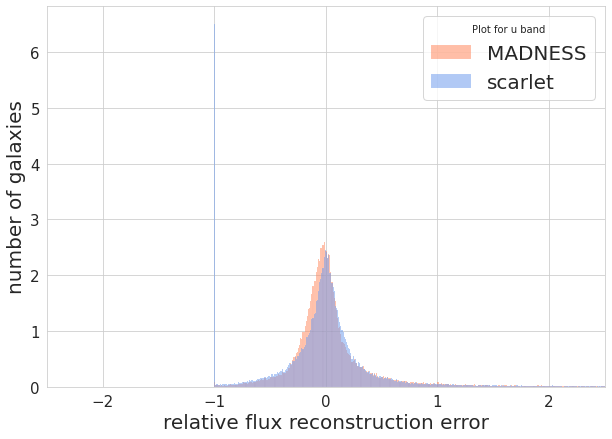

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Madness mu: -0.33925909743002813
Madness sig: 0.6985220832303234
Scarlet mu: 0.10580925282849321
Scarlet sig: 0.4517713770481303


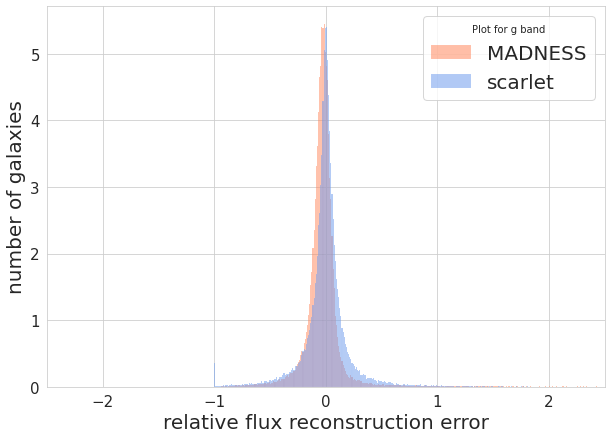

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Madness mu: -0.10042559282587014
Madness sig: 0.2193690528212132
Scarlet mu: -0.3759489208159486
Scarlet sig: 0.6854214356897612


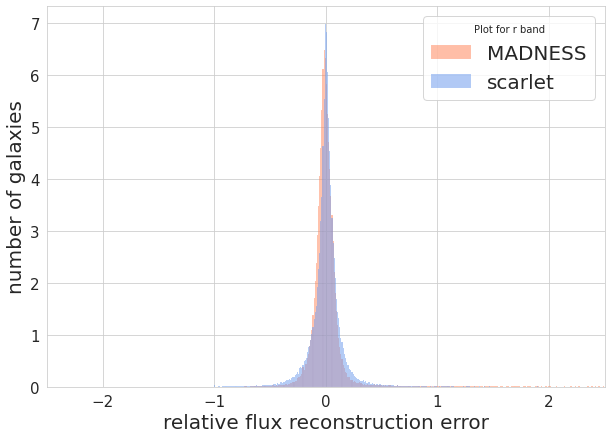

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Madness mu: -0.09842214559429441
Madness sig: 0.44038383856858737
Scarlet mu: -0.2827153546319592
Scarlet sig: 0.796431179124073


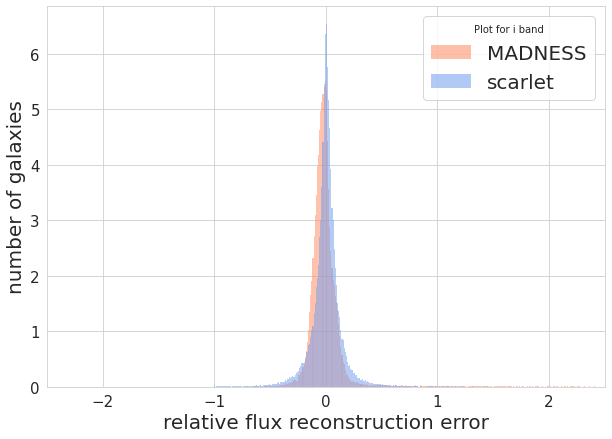

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Madness mu: -0.2823806118613095
Madness sig: 0.6399024066673538
Scarlet mu: -0.1422047448745302
Scarlet sig: 0.9556612790109107


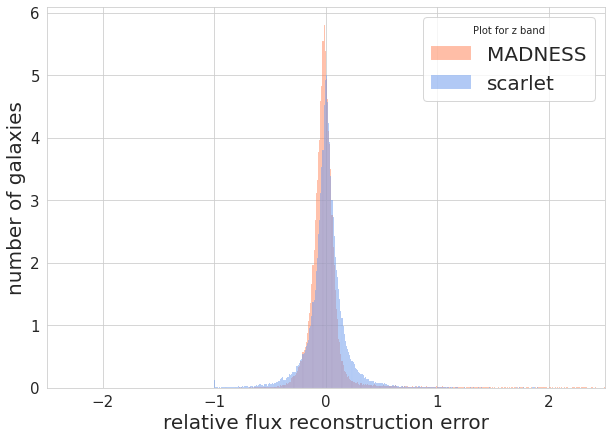

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Madness mu: -0.2660223193864471
Madness sig: 0.6598219441088169
Scarlet mu: -0.08053956425239933
Scarlet sig: 1.025593273044342


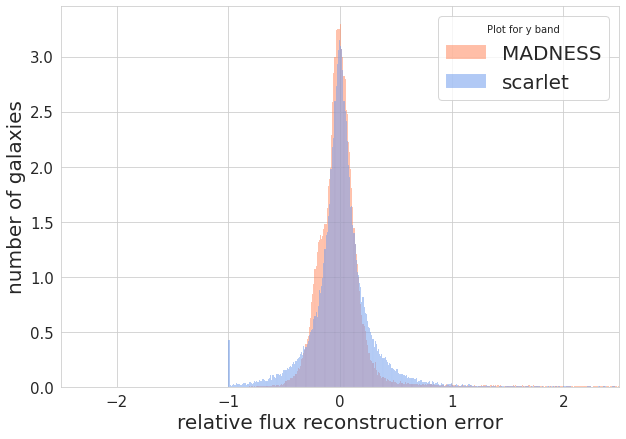

In [ ]:
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):

    madness_actual_flux = madness_results[band+"_actual_flux"].values
    madness_predicted_flux = madness_results[band+"_predicted_flux"].values

    scarlet_actual_flux = scarlet_results[band+"_actual_flux"].values
    scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].values

    scarlet_relative_difference = np.divide(
        scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
    )
    madness_relative_difference = np.divide(
        madness_predicted_flux - madness_actual_flux, madness_actual_flux
    )
    
    n_bins = 1000

    hist, bin_tmp = np.histogram(madness_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    madness_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])

    hist, bin_tmp = np.histogram(scarlet_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    scarlet_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])
    
#     sns.set_theme(style={"axes.grid": True,
#                      'axes.labelcolor': 'black',
#                      'figure.facecolor': '1.',
#                      'xtick.color': 'black',
#                      'ytick.color': 'black',
#                      'text.color': 'black',
#                      'image.cmap': 'viridis',})
    plt.figure(figsize=(10, 7))
    bins = np.arange(-5, 5, 0.01)
    sns.histplot(
        x = madness_relative_difference[
            np.logical_not(np.isnan(madness_relative_difference))
        ].reshape(-1),
        bins=bins,
        kde=False,
        alpha=0.5,
        stat="density",
        color="coral",
        label="MADNESS",
    )
#     plt.plot(bins, gauss(bins, *madness_fit[0]), color="coral")
    LOG.info("Madness mu: " + str(madness_fit[0][1]))
    LOG.info("Madness sig: " + str(madness_fit[0][0]))
    sns.histplot(
        x = scarlet_relative_difference[
            np.logical_not(np.isnan(scarlet_relative_difference))
        ].reshape(-1),
        bins=bins,
        kde=False,
        alpha=0.5,
        stat="density",
        color="cornflowerblue",
        label="scarlet",
    )
#     plt.plot(
#         bins, gauss(bins, scarlet_fit[0][0], scarlet_fit[0][1], scarlet_fit[0][2]), color="cornflowerblue"
#     )
    LOG.info("Scarlet mu: " + str(scarlet_fit[0][1]))
    LOG.info("Scarlet sig: " + str(scarlet_fit[0][0]))
    plt.legend(fontsize=20, title = "Plot for " + band + " band")
    ax = plt.gca()
    plt.xlabel("relative flux reconstruction error", fontsize=20)
    ax.tick_params(labelsize=15)
    plt.ylabel("number of galaxies", fontsize=20)
    plt.xlim([-2.5, 2.5])
    plt.show()

# Compare apperture photometry

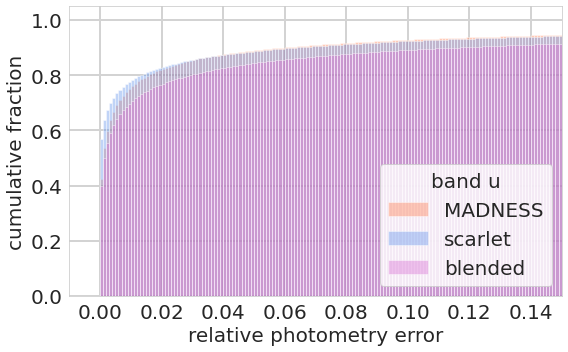

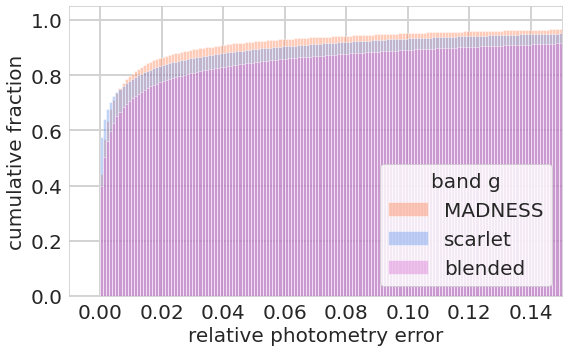

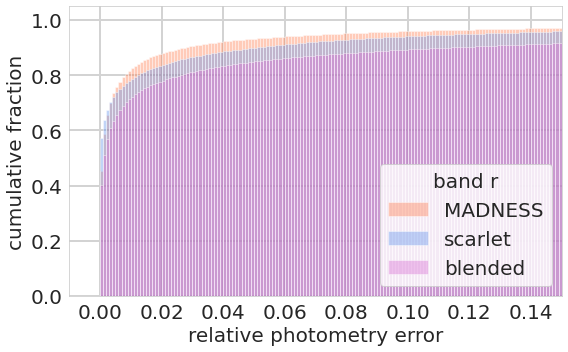

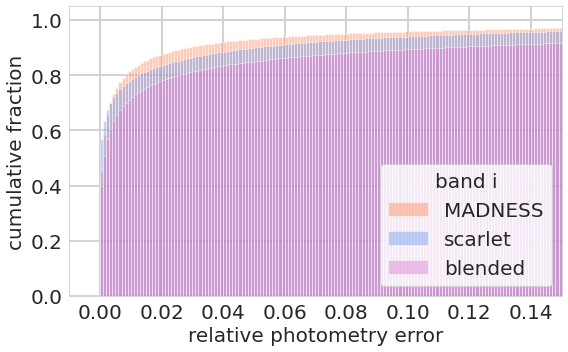

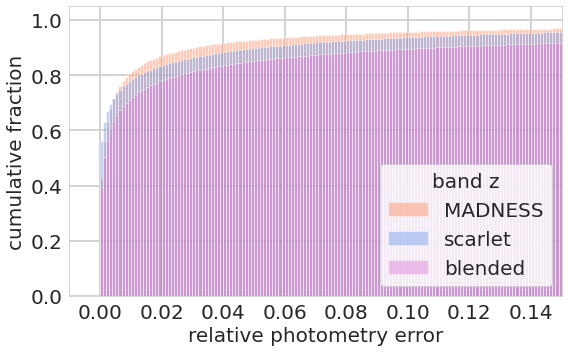

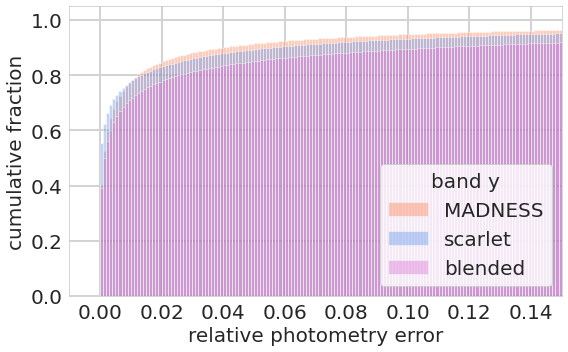

In [ ]:
for band in ['u', 'g', 'r', 'i', 'z', 'y']:
    #sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    sns.set_style("whitegrid")
#     sns.set_theme(style={"axes.grid": True,'grid.color': 'black',
# })
    plt.figure(figsize=(8, 5))
    bins = np.arange(-1, 1, 0.001)
    plt.hist(
        np.abs((madness_results[band+"_phot_flux"].values - actual_photometry[band+"_phot_flux"].values) / actual_photometry[band+"_phot_flux"].values),
        bins=bins,
        alpha=0.4,
        density=True,
        label="MADNESS",
        cumulative=True,
        color="coral"
    )

    plt.hist(
        np.abs((scarlet_results[band+"_phot_flux"].values - actual_photometry[band+"_phot_flux"].values) / actual_photometry[band+"_phot_flux"].values),
        bins=bins,
        density=True,
        alpha=0.4,
        label="scarlet",
        cumulative=True,
        color="cornflowerblue"
    )

    plt.hist(
        np.abs((blended_photometry[band+"_phot_flux"].values - actual_photometry[band+"_phot_flux"].values) / actual_photometry[band+"_phot_flux"].values),
        bins=bins,
        alpha=0.4,
        density=True,
        label="blended",
        cumulative=True,
        color="orchid",
    )
    ax = plt.gca()
    ax.grid(color='lightgray', linestyle='-', linewidth=2)
    plt.xlim([-.01, .15])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("relative photometry error", fontsize=20)
    plt.ylabel("cumulative fraction", fontsize=20)
    plt.legend(fontsize=20, title="band " + band, loc="lower right", title_fontsize=20)
    plt.tight_layout()
    plt.savefig("results/"+ density_level + "_density/cumulative_distib_phot_err_"+band)
    plt.savefig("results/"+ density_level + "_density/cumulative_distib_phot_err_"+band + ".pdf", format="pdf", bbox_inches="tight")
    plt.show()

# Box plots

SNR definition here is one used to place the SNR>10 cut on the catalog.

In [ ]:
boxplot_snr_df = {}

# madness_actual_flux = madness_results[band+"_actual_flux"].value
# madness_predicted_flux = madness_results[band+"_predicted_flux"].value

# scarlet_actual_flux = scarlet_results[band+"_actual_flux"].value
# scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].value

# scarlet_relative_difference = np.divide(
#     scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
# )
# madness_relative_difference = np.divide(
#     madness_predicted_flux - madness_actual_flux, madness_actual_flux
# )
boxplot_snr_df["snr"] = list(madness_results['r_band_snr'])
boxplot_snr_df["type"] = ["madness"] * len(madness_results)
#boxplot_snr_df["r_relative_flux_err"] = list(madness_relative_difference)
boxplot_snr_df["r_relative_flux_err"] = list(np.abs((madness_results["r_phot_flux"].values - actual_photometry["r_phot_flux"].values)) / actual_photometry["r_phot_flux"].values)


boxplot_snr_df["snr"].extend(list(scarlet_results['r_band_snr']))
boxplot_snr_df["type"].extend(["scarlet"] * len(scarlet_results['size']))
boxplot_snr_df["r_relative_flux_err"].extend(list(np.abs((scarlet_results["r_phot_flux"].values - actual_photometry["r_phot_flux"].values)) / actual_photometry["r_phot_flux"].values)) 

boxplot_snr_df = pd.DataFrame(boxplot_snr_df)

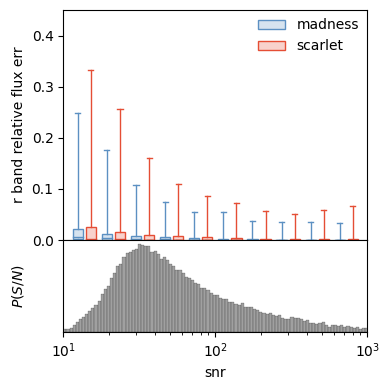

In [ ]:
import maddeb.boxplot
import matplotlib as mpl

fig, median_fluxerr, q1_fluxerr, q3_fluxerr, whislo_fluxerr, whishi_fluxerr = maddeb.boxplot.boxplot_func(
    boxplot_snr_df, 
    x = 'snr', y = "r_relative_flux_err", z = "type",
    xlim = (10, 1000),
    ylim = (-0, 0.45), 
    x_scale = 'log',
    legend = ['madness', 'scarlet'],
    x_label='Signal to noise ratio S/N', 
    y_label = 'r band relative flux err',
    y_label_hist='$P(S/N)$',
    legend_remove = False,
    whis = [5,95],
    percents = [25,75],
    palette = mpl.cm.RdYlBu([0.85,0.15]),#0.35,
    nbins = 10
)

plt.savefig(os.path.join("results", density_level + "_density", "snr_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density", "snr_box_plot.png"))

In [ ]:
import scipy
scipy.stats.norm.cdf(-2)

0.022750131948179195

In [ ]:
madness_results

,u_covariance,u_actual_flux,u_predicted_flux,u_blendedness,g_covariance,g_actual_flux,g_predicted_flux,g_blendedness,r_covariance,r_actual_flux,...,i_phot_flux,i_phot_fluxerrs,i_phot_flags,z_phot_flux,z_phot_fluxerrs,z_phot_flags,y_phot_flux,y_phot_fluxerrs,y_phot_flags,r_contamination
0,0.995475,4173.718411,3665.836182,0.000742,0.998651,3.995404e+04,3.779557e+04,0.001277,0.999429,1.603414e+05,...,2.076298e+05,3816.917285,0,1.660340e+05,4431.552302,0,9.021563e+04,4774.056192,0,0.000900
1,0.991855,1037.598037,2261.192871,0.004355,0.997249,4.597183e+04,3.706789e+04,0.001249,0.996618,1.002476e+05,...,4.331311e+04,3815.945935,0,2.561739e+04,4430.424538,0,1.144632e+04,4772.841265,0,0.000907
2,0.997342,7401.828339,7910.015137,0.001510,0.999646,1.007914e+05,9.763540e+04,0.001598,0.999839,4.069624e+05,...,3.727138e+05,3817.888387,0,2.811445e+05,4432.679780,0,1.588429e+05,4775.270810,0,0.000687
3,0.997931,3404.727370,3871.641357,0.018339,0.999018,2.739047e+04,2.921436e+04,0.015261,0.999331,7.706753e+04,...,9.210670e+04,3816.917285,0,7.900947e+04,4431.552302,0,4.713278e+04,4774.056192,0,0.008861
4,0.996694,1660.623889,1862.722412,0.013465,0.996788,1.562085e+04,1.610701e+04,0.017216,0.996296,4.992431e+04,...,4.734281e+04,3817.888387,0,3.913306e+04,4432.679780,0,1.752332e+04,4775.270810,0,0.011086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.999272,18260.437483,18591.480469,0.001673,0.999742,1.385112e+05,1.403450e+05,0.003153,0.999796,3.583450e+05,...,3.013747e+05,3793.099905,0,2.459666e+05,4398.573496,0,1.752734e+05,4780.361358,0,0.006317
233,0.998445,5923.653559,6299.340820,0.010387,0.998950,4.426555e+04,4.499267e+04,0.012438,0.998859,1.051567e+05,...,1.053733e+05,3780.563885,0,9.314520e+04,4384.036414,0,4.768226e+04,4764.562485,0,0.015529
234,0.992802,278281.474480,213906.187500,0.001312,0.999164,4.284096e+06,3.862436e+06,0.000729,0.999462,2.160963e+07,...,9.737915e+06,3791.173984,0,7.426905e+06,4396.340151,0,3.966209e+06,4777.934162,0,0.000013
235,0.994734,1824.228484,2388.270996,0.009952,0.996241,1.596096e+04,1.846530e+04,0.016971,0.996411,4.517517e+04,...,5.425047e+04,3792.137067,0,3.816279e+04,4397.456965,0,2.064517e+04,4779.147914,0,0.024904


In [ ]:
boxplot_blendedness_df = {}

boxplot_blendedness_df['r_blendedness'] = list(madness_results['r_blendedness'])
boxplot_blendedness_df['r_contamination'] = list(madness_results['r_contamination'])
boxplot_blendedness_df["type"] = ["madness"] * len(madness_results['size'])
boxplot_blendedness_df["r_relative_flux_err"] = list(np.abs((madness_results["r_phot_flux"].values - actual_photometry["r_phot_flux"].values)) / actual_photometry["r_phot_flux"].values)


boxplot_blendedness_df['r_blendedness'].extend(list(scarlet_results['r_blendedness']))
boxplot_blendedness_df['r_contamination'].extend(list(madness_results['r_contamination']))
boxplot_blendedness_df["type"].extend(["scarlet"] * len(scarlet_results['size']))
boxplot_blendedness_df["r_relative_flux_err"].extend(list(np.abs((scarlet_results["r_phot_flux"].values - actual_photometry["r_phot_flux"].values)) / actual_photometry["r_phot_flux"].values)) 

boxplot_blendedness_df = pd.DataFrame(boxplot_blendedness_df)

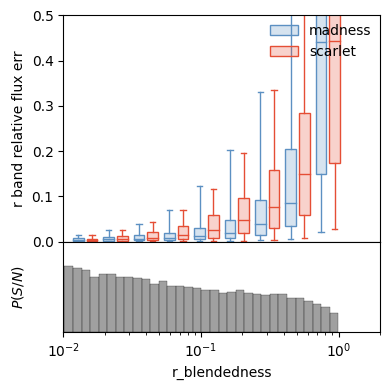

In [ ]:
import maddeb.boxplot
import matplotlib as mpl

fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    boxplot_blendedness_df, 
    x = 'r_blendedness', y = "r_relative_flux_err", z = "type",
    xlim = (1e-2, 2),
    ylim = (-0, .5), 
    x_scale = 'log',
    legend = ['madness', 'scarlet'],
    x_label='Signal to noise ratio S/N', 
    y_label = 'r band relative flux err',
    y_label_hist='$P(S/N)$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=mpl.cm.RdYlBu([0.85,0.15]),#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "blendedness_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "blendedness_box_plot.png"))

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


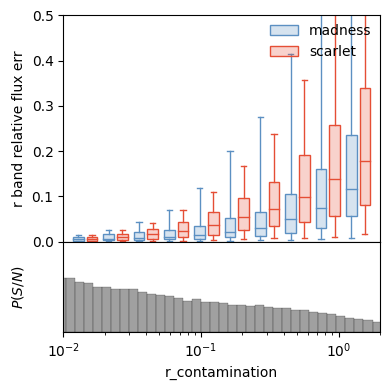

In [ ]:
fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(
    boxplot_blendedness_df, 
    x = 'r_contamination', y = "r_relative_flux_err", z = "type",
    xlim = (1e-2, 2),
    ylim = (-0, .5), 
    x_scale = 'log',
    legend = ['madness', 'scarlet'],
    x_label='Signal to noise ratio S/N', 
    y_label = 'r band relative flux err',
    y_label_hist='$P(S/N)$',
    legend_remove = False,
    whis = [5, 95],
    percents = [25, 75],
    palette=mpl.cm.RdYlBu([0.85,0.15]),#0.35,
    nbins = 10,
)
plt.savefig(os.path.join("results", density_level + "_density", "contamination_box_plot.pdf"))
plt.savefig(os.path.join("results", density_level + "_density",  "contamination_box_plot.png"))

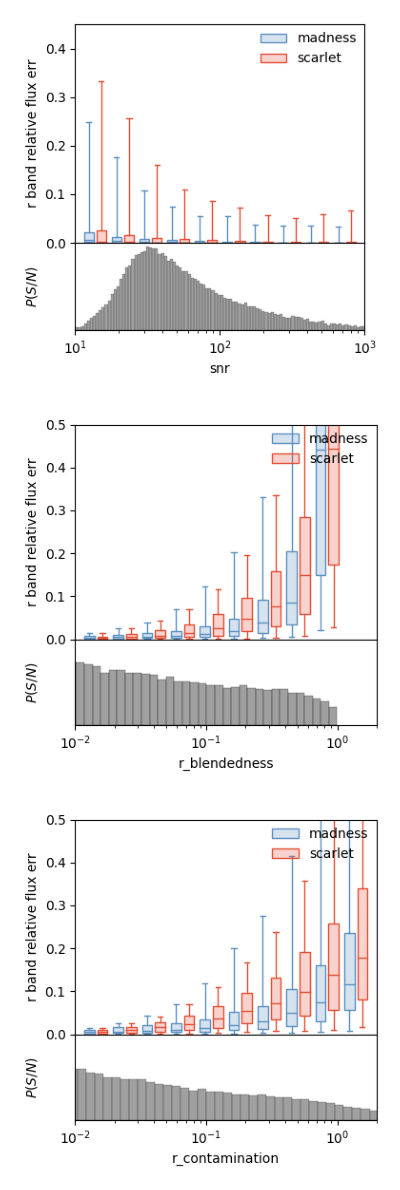

In [ ]:
import matplotlib.image as mpimg

f, axarr = plt.subplots(3, 1, figsize=(8, 12))

#axarr[0].imshow(mpimg.imread(os.path.join(result_dir_path, "cumulative_distib_phot_err_r.png")))
axarr[0].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "snr_box_plot.png")))
axarr[1].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "blendedness_box_plot.png")))
axarr[2].imshow(mpimg.imread(os.path.join("results", density_level + "_density", "contamination_box_plot.png")))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout()

plt.savefig("results/" + density_level + "_density/boxplot_results.pdf", format="pdf", bbox_inches="tight")
plt.savefig("results/" + density_level + "_density/boxplot_results.png")

plt.show()

# Validation plots

In [ ]:
snr_blendedness_df = {}
snr_blendedness_df["snr"] = madness_results['r_band_snr']
snr_blendedness_df["blendedness"] = madness_results['r_blendedness']


<AxesSubplot:>

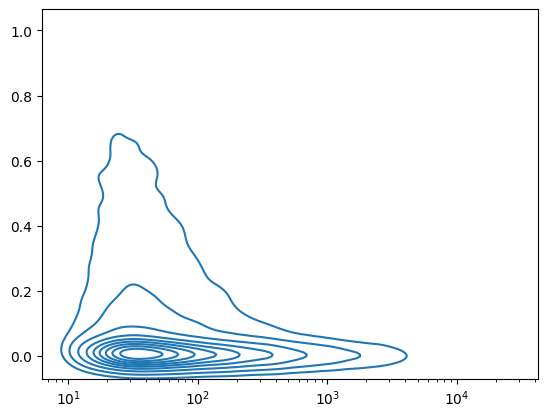

In [ ]:
sns.kdeplot(x=madness_results['r_band_snr'].values, y=madness_results['r_blendedness'].values, log_scale=[True, False])

<AxesSubplot:xlabel='Count'>

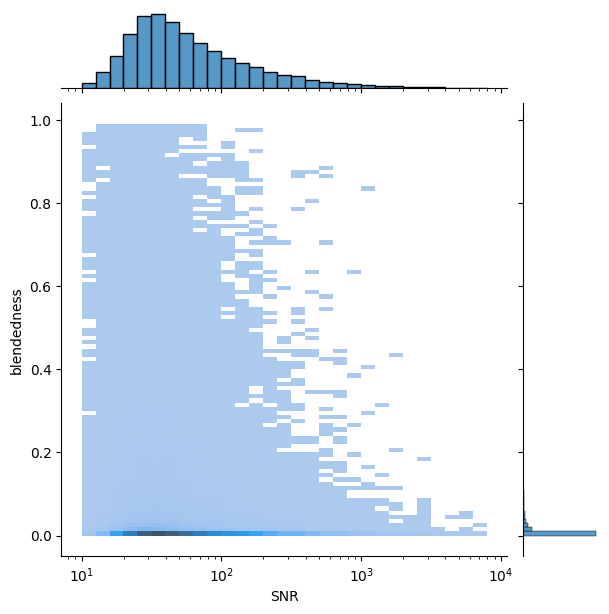

In [ ]:
g = sns.JointGrid()
x_bins = np.arange(1,4,.10)
y_bins = np.arange(0.00, 1, .01)
sns.histplot(x=madness_results['r_band_snr'].values, y=madness_results['r_blendedness'].values, ax=g.ax_joint, bins=[x_bins, y_bins], log_scale=[True, False], kde=True)
g.ax_joint.set_xlabel("SNR")
g.ax_joint.set_ylabel("blendedness")
sns.histplot(x=madness_results['r_band_snr'].values, ax=g.ax_marg_x, bins=x_bins, kde_kws={'clip': (0,500)})
sns.histplot(y=madness_results['r_blendedness'].values, ax=g.ax_marg_y, bins=y_bins)

<AxesSubplot:xlabel='Count'>

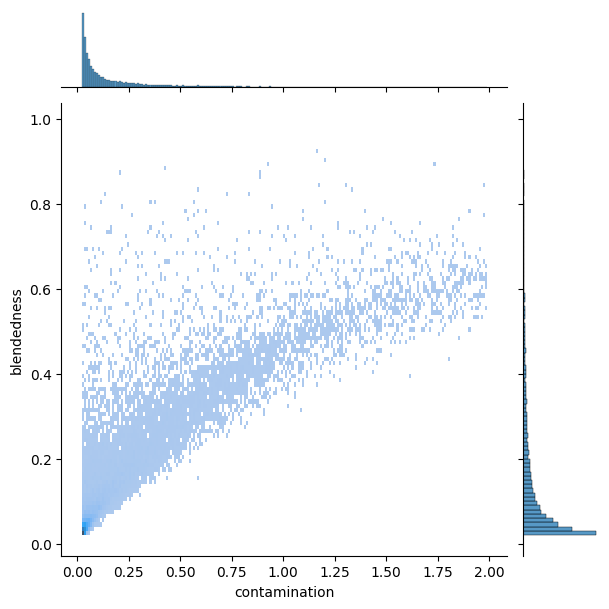

In [ ]:
g = sns.JointGrid()
x_bins = np.arange(.02, 2, .01)
y_bins = np.arange(0.02, 1, .01)
sns.histplot(x=madness_results['r_contamination'].values, y=madness_results['r_blendedness'].values, ax=g.ax_joint, bins=[x_bins, y_bins], log_scale=[False, False], kde=True)
g.ax_joint.set_xlabel("contamination")
g.ax_joint.set_ylabel("blendedness")
sns.histplot(x=madness_results['r_contamination'].values, ax=g.ax_marg_x, bins=x_bins, kde_kws={'clip': (0,500)})
sns.histplot(y=madness_results['r_blendedness'].values, ax=g.ax_marg_y, bins=y_bins)

# 

<AxesSubplot:xlabel='Count'>

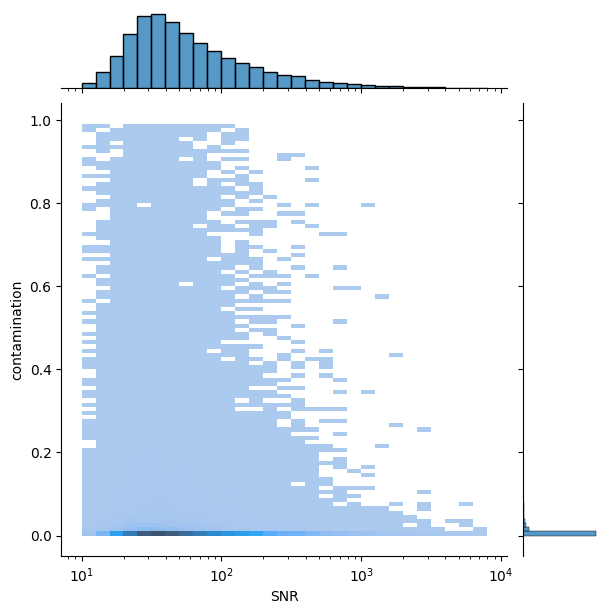

In [ ]:
g = sns.JointGrid()
x_bins = np.arange(1,4,.10)
y_bins = np.arange(0.00, 1, .01)
sns.histplot(x=madness_results['r_band_snr'].values, y=madness_results['r_contamination'].values, ax=g.ax_joint, bins=[x_bins, y_bins], log_scale=[True, False], kde=True)
g.ax_joint.set_xlabel("SNR")
g.ax_joint.set_ylabel("contamination")
sns.histplot(x=madness_results['r_band_snr'].values, ax=g.ax_marg_x, bins=x_bins, kde_kws={'clip': (0,500)})
sns.histplot(y=madness_results['r_contamination'].values, ax=g.ax_marg_y, bins=y_bins)

Plot for u band


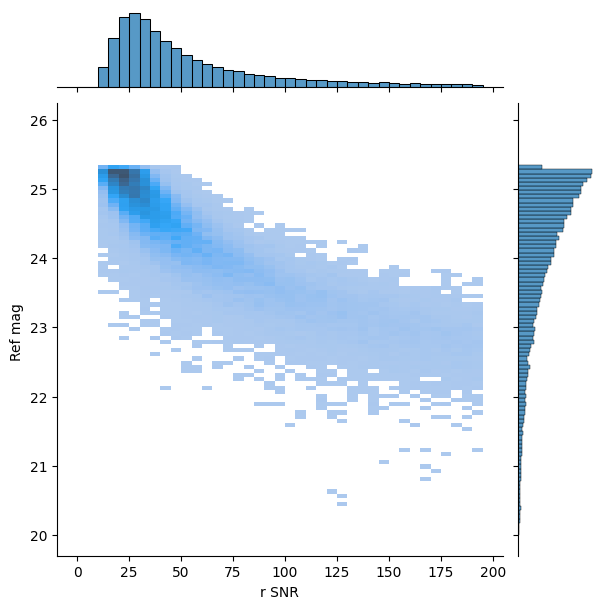

Plot for g band


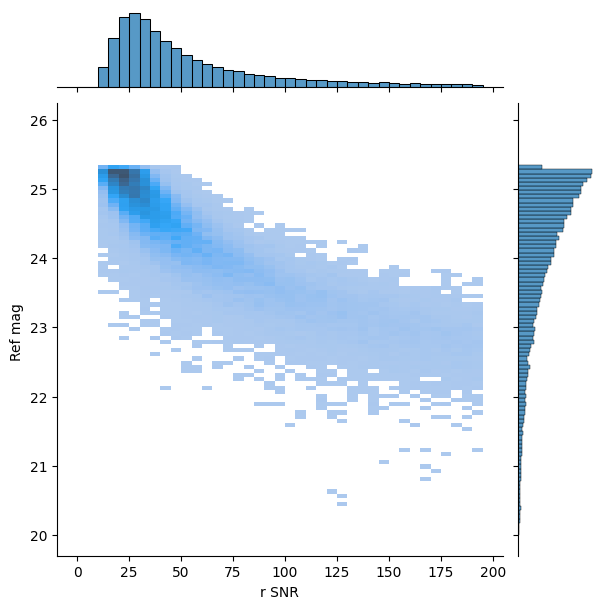

Plot for r band


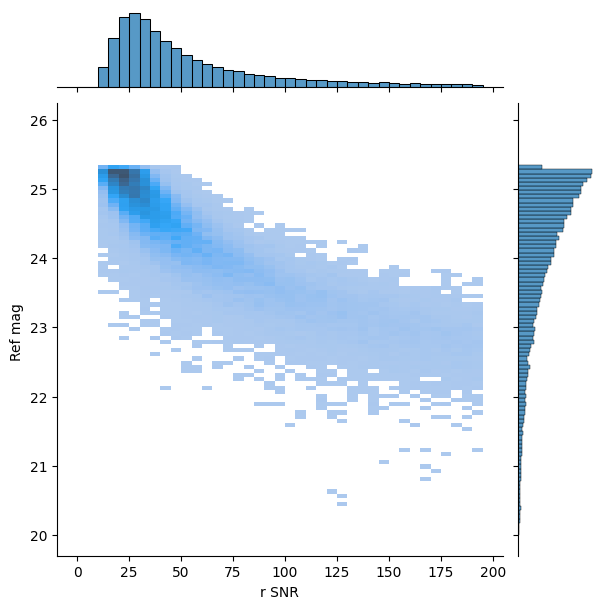

Plot for i band


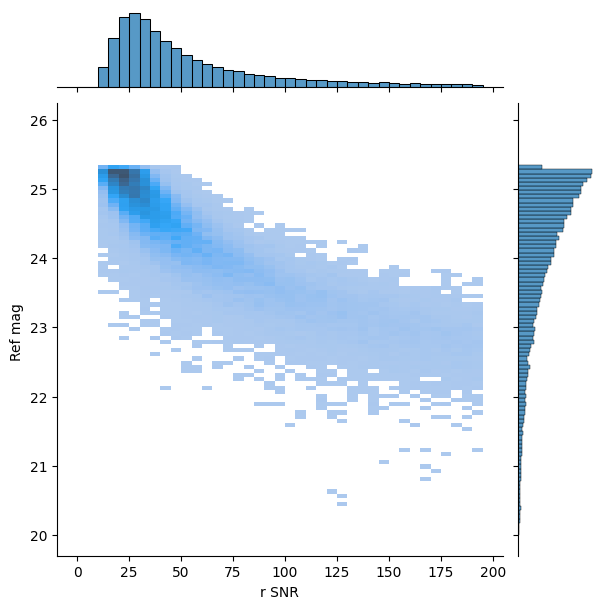

Plot for z band


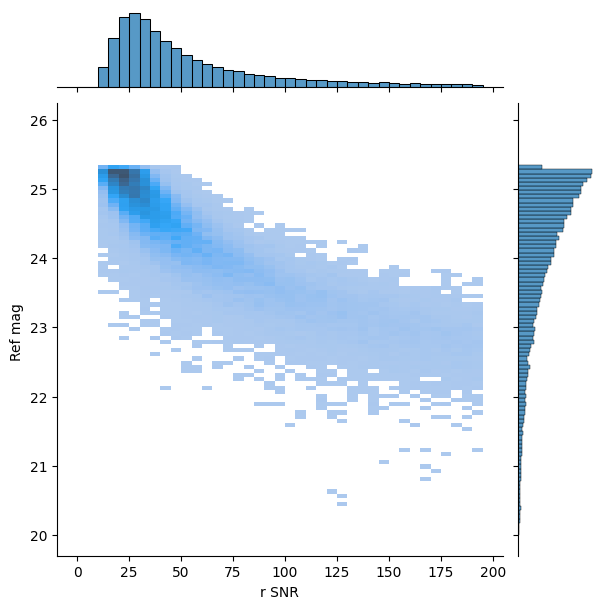

Plot for y band


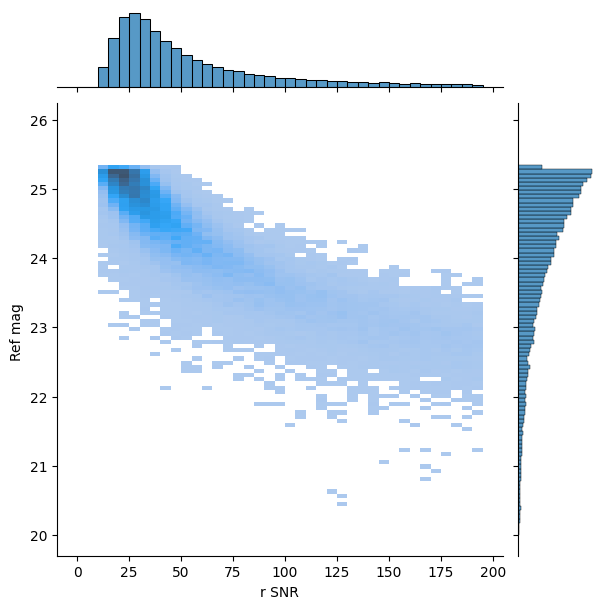

In [ ]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    print(f"Plot for {band} band")
    #snr = actual_photometry[band+"_phot_flux"].values / actual_photometry[band+"_phot_fluxerrs"].values
    snr = madness_results["r_band_snr"].values
    # mag = madness_results["ref_mag"].values
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,200,5.0)
    y_bins = np.arange(20, 26, 6/100.0)
    #sns.histplot(x=snr, y=madness_results["ref_mag"], bins=[x_bins, y_bins], kde=False, cbar=True)
    g = sns.JointGrid()
    sns.histplot(x=snr, y=madness_results["ref_mag"].values, bins=[x_bins, y_bins], kde=False, ax=g.ax_joint)
    g.ax_joint.set_xlabel("r SNR")
    g.ax_joint.set_ylabel("Ref mag ")
    sns.histplot(x=snr, ax=g.ax_marg_x, bins=x_bins, kde_kws={'clip': (0,500)})
    sns.histplot(y=madness_results["ref_mag"].values, ax=g.ax_marg_y, bins=y_bins)
    #ax.set(xlabel='SNR', ylabel='Ref Mag '+band)
    
    plt.show()